In [1]:
!pip install pyDOE
!pip install smt

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18168 sha256=7ec420cfb1270de68deab298fb64a46f17c4a2e89628595553e220ea8fb739a5
  Stored in directory: /root/.cache/pip/wheels/ce/b6/d7/c6b64746dba6433c593e471e0ac3acf4f36040456d1d160d17
Successfully built pyDOE
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.7/833.7 kB 6.4 MB/s eta 0:00:00


In [2]:
# Support for math
import numpy as np
import math

# Plotting tools
from matplotlib import pyplot as plt
import matplotlib as mplt

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

#Data frames tools
import pandas as pd

#LHS sampling
from pyDOE import lhs

# import random
from random import sample


In [3]:
def subplot_fig(data,i,size,data_name,color):
  plt.subplot(size[0], size[1], i)
  plt.scatter(data[0],data[1],color = color)
  plt.xlabel('%s' %data_name[0])
  plt.ylabel('%s' %data_name[1])
  plt.grid()

In [4]:
#intervals

conc = np.arange(90,105,5)
vol = np.arange(33,110,10)
temp = np.arange(20,180,10)
time = np.arange(30,610,30)

space = [len(conc),len(vol),len(temp),len(time)]
space_size = np.prod(space)

space_size,space

(7680, [3, 8, 16, 20])

In [5]:
data = {
  "concentration": conc,
  "Volume": vol,
  "Temperature": temp,
  "Time": time
}

#load data into a DataFrame object:
#df = pd.DataFrame(data)


In [6]:
# Create a meshgrid to generate all combinations of values
conc, vol, temp, time = np.meshgrid(conc, vol, temp, time, indexing='ij')

# Stack the arrays along the last axis to create the 4D array
data_set = np.stack((conc, vol, temp, time), axis=-1)
data_set.shape

(3, 8, 16, 20, 4)

In [7]:
from smt.sampling_methods import LHS
import random

#xlimits = np.array([[0.0, 4.0], [0.0, 3.0],[0.0,3.0],[0.0,3.0]])
xlimits = np.array([[75.0, 100.0], [33.0, 100.0],[20.0,170.0],[30.0,600.0]])
sampling = LHS(xlimits=xlimits,random_state = np.random.RandomState(0))

num = 15
x = sampling(num)

print(x.shape)
lhs_data = pd.DataFrame(x, columns=['concentration', 'volume', 'temp','time'])
lhs_data

lhs_std_dev = np.std(x)
lhs_var_dev = np.var(x)
x//1

(15, 4)


array([[ 85.,  70.,  25., 466.],
       [ 82.,  62.,  75., 239.],
       [ 79.,  88., 165., 543.],
       [ 99.,  53.,  35., 505.],
       [ 89.,  84.,  65.,  49.],
       [ 92.,  75., 105., 315.],
       [ 80.,  39.,  85., 125.],
       [ 90.,  57., 125., 163.],
       [ 94.,  66., 155., 353.],
       [ 77.,  93.,  55., 277.],
       [ 75.,  79., 145., 201.],
       [ 95.,  97., 115.,  87.],
       [ 84.,  48.,  45., 429.],
       [ 97.,  35., 135., 391.],
       [ 87.,  44.,  95., 581.]])

STEP2: Clustering

Centroids of Temperature Clusters:
[[ 95.]
 [145.]
 [ 45.]]


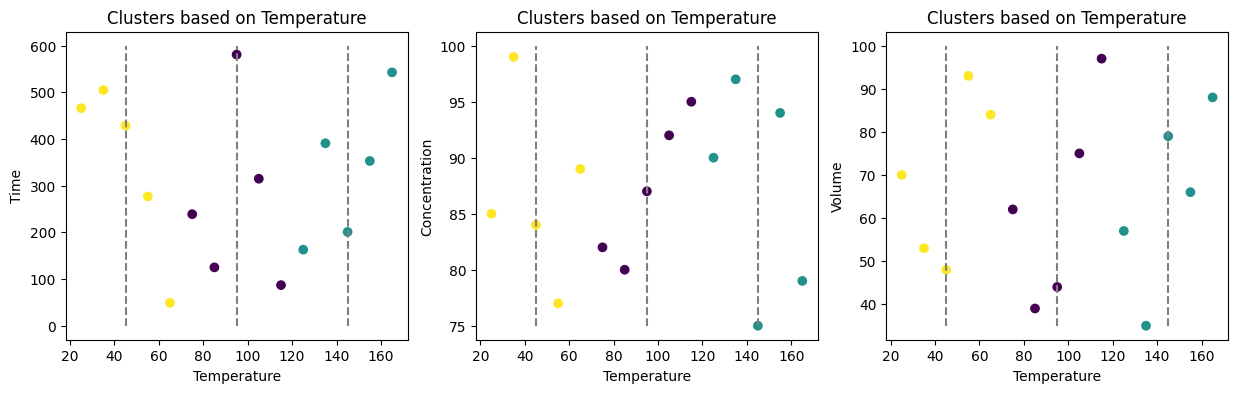

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

conc = x[:,0]//1
volm = x[:,1]//1
temp = x[:,2]//1
time = x[:,3]//1

data = {
    'conc': conc,
    'volm': volm,
    'temp': temp,
    'time': time
}
df = pd.DataFrame(data)

# Select the 'temp' column for clustering
temp_data = df[['temp']]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
temp_data_scaled = scaler.fit_transform(temp_data)

# Choose the number of clusters
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['temp_cluster'] = kmeans.fit_predict(temp_data_scaled)

# Get the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Display the centroids
print("Centroids of Temperature Clusters:")
print(centroids)

# Visualize the clusters
fig = plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(df['temp'], df['time'], c=df['temp_cluster'], cmap='viridis')
plt.vlines(centroids,0,600, color = 'tab:grey',linestyle='dashed')
plt.xlabel('Temperature')
plt.ylabel('Time')
plt.title('Clusters based on Temperature')

plt.subplot(1,3,2)
plt.scatter(df['temp'], df['conc'], c=df['temp_cluster'], cmap='viridis')
plt.vlines(centroids,75,100, color = 'tab:grey',linestyle='dashed')
plt.xlabel('Temperature')
plt.ylabel('Concentration')
plt.title('Clusters based on Temperature')


plt.subplot(1,3,3)
plt.scatter(df['temp'], df['volm'], c=df['temp_cluster'], cmap='viridis')
plt.vlines(centroids,35,100, color = 'tab:grey',linestyle='dashed')
plt.xlabel('Temperature')
plt.ylabel('Volume')
plt.title('Clusters based on Temperature')



plt.show()

In [10]:
df

,conc,volm,temp,time,temp_cluster
0,85.0,70.0,25.0,466.0,2
1,82.0,62.0,75.0,239.0,0
2,79.0,88.0,165.0,543.0,1
3,99.0,53.0,35.0,505.0,2
4,89.0,84.0,65.0,49.0,2
5,92.0,75.0,105.0,315.0,0
6,80.0,39.0,85.0,125.0,0
7,90.0,57.0,125.0,163.0,1
8,94.0,66.0,155.0,353.0,1
9,77.0,93.0,55.0,277.0,2


In [11]:
#Re-organize table to three temperatures:
# Example usage:
temp1 = centroids[0]
temp2 = centroids[1]
temp3 = centroids[2]


for i in range(len(df)):
  d1 = abs(df.temp[i]-temp1)
  d2 = abs(df.temp[i]-temp2)
  d3 = abs(df.temp[i]-temp3)

  if min(d1,d2,d3) == d1:
    df.temp[i] = temp1
  elif min(d1,d2,d3) == d2:
    df.temp[i] = temp2
  else:
    df.temp[i] = temp3

df.sort_values('temp')



,conc,volm,temp,time,temp_cluster
0,85.0,70.0,45.0,466.0,2
3,99.0,53.0,45.0,505.0,2
4,89.0,84.0,45.0,49.0,2
9,77.0,93.0,45.0,277.0,2
12,84.0,48.0,45.0,429.0,2
1,82.0,62.0,95.0,239.0,0
5,92.0,75.0,95.0,315.0,0
6,80.0,39.0,95.0,125.0,0
11,95.0,97.0,95.0,87.0,0
14,87.0,44.0,95.0,581.0,0


Text(0.5, 0, 'Time')

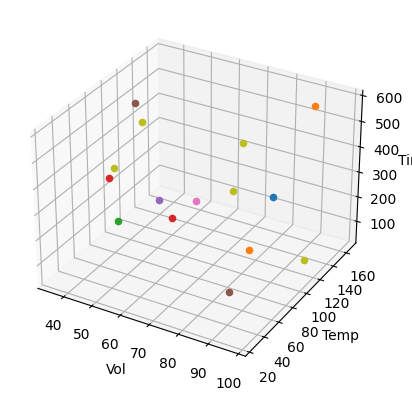

In [16]:
#Plot of LHS in 3D color coded
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

min = 75
step = 5/2
for i in range(num):
  if x[i,0]>= min and x[i,0]< min+step: # 75 < x < 77.5
    ax.scatter(x[i, 1], x[i, 2],x[i,3], color ='tab:blue')
  elif x[i,0]>= min+step and x[i,0]< min+2*step: # 77.5 < x < 80
    ax.scatter(x[i, 1], x[i, 2],x[i,3], color ='tab:orange')
  elif x[i,0]>= min+2*step and x[i,0]< min+3*step: # 80 < x < 82.5
    ax.scatter(x[i, 1], x[i, 2],x[i,3], color ='tab:green')
  elif x[i,0]>= min+3*step and x[i,0]< min+4*step: # 82.5 < x < 85
    ax.scatter(x[i, 1], x[i, 2],x[i,3], color ='tab:red')
  elif x[i,0]>= min+4*step and x[i,0]< min+5*step: # 85 < x < 87.5
    ax.scatter(x[i, 1], x[i, 2],x[i,3], color ='tab:purple')
  elif x[i,0]>= min+5*step and x[i,0]< min+6*step: # 87.5 < x < 90
    ax.scatter(x[i, 1], x[i, 2],x[i,3], color ='tab:brown')
  elif x[i,0]>= min+6*step and x[i,0]< min+7*step: # 90 < x < 92.5
    ax.scatter(x[i, 1], x[i, 2],x[i,3], color ='tab:pink')
  elif x[i,0]>= min+6*step and x[i,0]< min+7*step: # 92 < x < 95
    ax.scatter(x[i, 1], x[i, 2],x[i,3], color ='tab:cyan')
  else: # x[i,0]>= 95
    ax.scatter(x[i, 1], x[i, 2],x[i,3], color ='tab:olive')


# plt.plot(x[:, 0], x[:, 1], "o")
ax.set_xlabel('Vol')
ax.set_ylabel('Temp')
ax.set_zlabel('Time')
#ax.legend("Concentration")

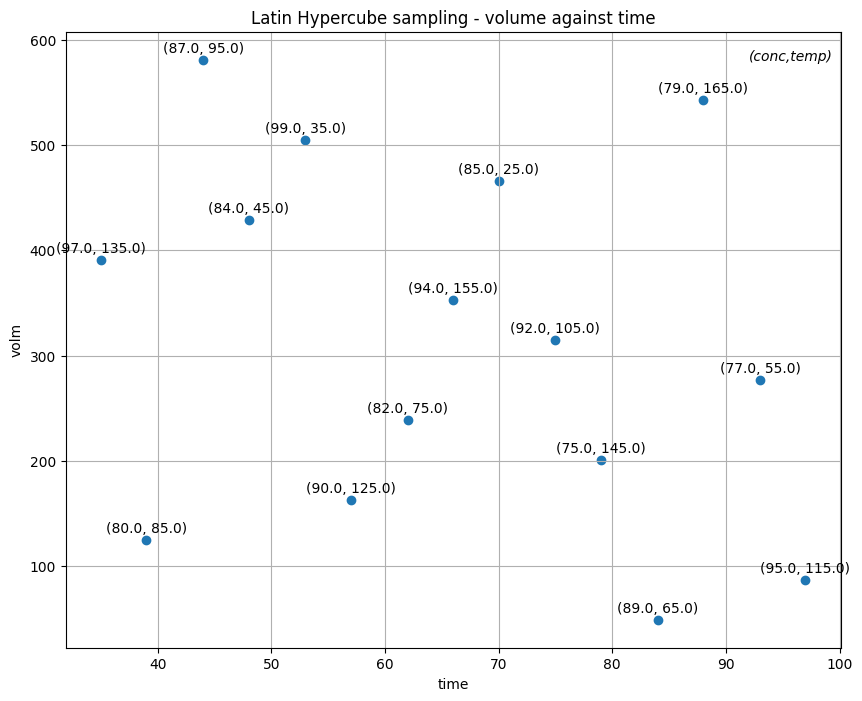

In [17]:
#2D plots for LHS visualization
fig = plt.figure(figsize=(10,8))


conc = x[:,0]//1
volm = x[:,1]//1
temp = x[:,2]//1
time = x[:,3]//1
labels = zip(conc,temp)

plt.scatter(volm,time)
plt.title("Latin Hypercube sampling - volume against time")
plt.xlabel('time')
plt.ylabel('volm')
plt.text(92, 580, '(conc,temp)', style='italic')

# Annotate each point with its label
for i, label in enumerate(labels):
    #plt.annotate(label, (volm[i], time[i]), textcoords="offset points", xytext=(0,5), ha='center')
    plt.annotate(label, (volm[i], time[i]), textcoords="offset points", xytext=(0,5), ha='center')


plt.grid()
plt.show()

# plt.scatter(x[:,3],x[:,1],color = 'orange')
# plt.title("time vs vol")
# plt.xlabel('time')
# plt.ylabel('vol')
# plt.grid()

# plt.scatter(x[:,3],x[:,2],color = 'green')
# plt.title("time vs temp")
# plt.xlabel('time')
# plt.ylabel('temp')
# plt.grid()







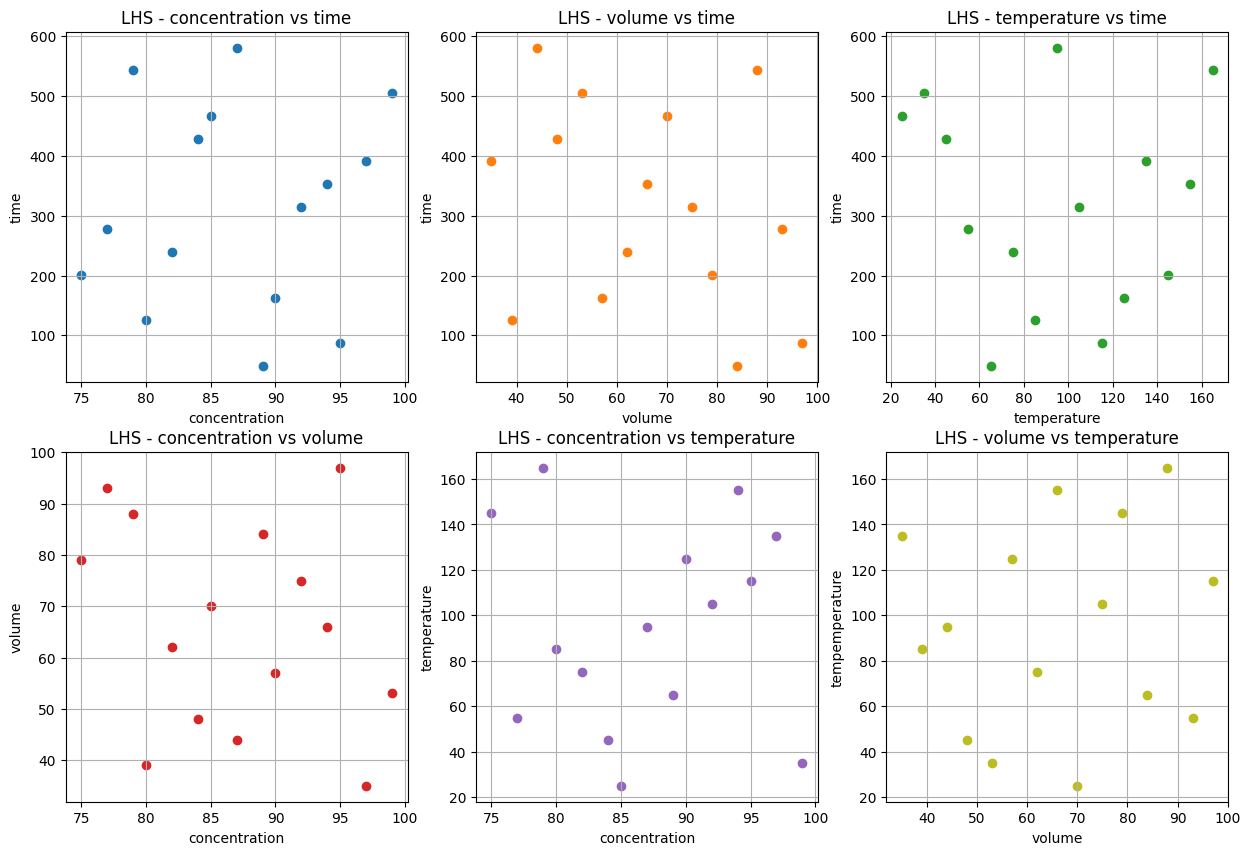

In [18]:
#2D plots for LHS visualization
fig = plt.figure(figsize=(15,10))


conc = x[:,0]//1
volm = x[:,1]//1
temp = x[:,2]//1
time = x[:,3]//1
labels = zip(conc,temp)

size = [2,3]

subplot_fig([conc,time],1,size,['concentration','time'],'tab:blue')
plt.title("LHS - concentration vs time")

subplot_fig([volm,time],2,size,['volume','time'],'tab:orange')
plt.title("LHS - volume vs time")

subplot_fig([temp,time],3,size,['temperature','time'],'tab:green')
plt.title("LHS - temperature vs time")

subplot_fig([conc,volm],4,size,['concentration','volume'],'tab:red')
plt.title("LHS - concentration vs volume")

subplot_fig([conc,temp],5,size,['concentration','temperature'],'tab:purple')
plt.title("LHS - concentration vs temperature")

subplot_fig([volm,temp],6,size,['volume','tempemperature'],'tab:olive')
plt.title("LHS - volume vs temperature")


plt.show()



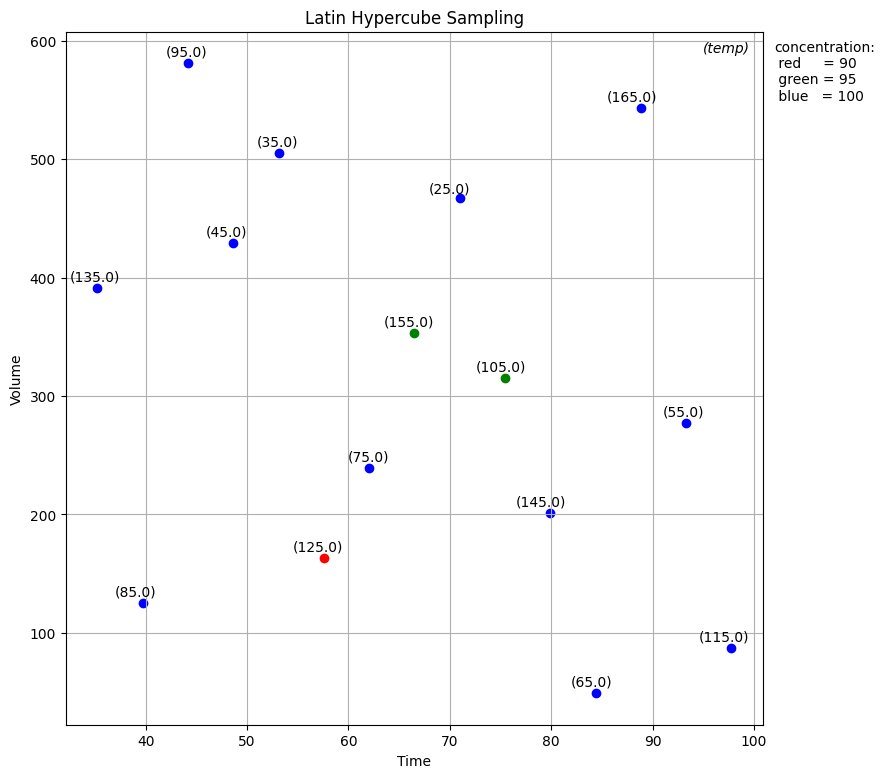

In [19]:
fig = plt.figure(figsize=(9,9))

for i in range(num):
  if x[i,0]>= 90 and x[i,0]< 92.5:
    plt.scatter(x[i, 1], x[i, 3], color ='r')
  elif x[i,0]>= 92.5 and x[i,0]< 95:
    plt.scatter(x[i, 1], x[i, 3], color ='g')
  else: # x[i,0]>= 95
    plt.scatter(x[i, 1], x[i, 3], color ='b')

# Annotate each point with its label
for i,temps in enumerate(temp):
    #plt.annotate(label, (volm[i], time[i]), textcoords="offset points", xytext=(0,5), ha='center')
    plt.annotate('(%s)' %temps, (volm[i], time[i]), textcoords="offset points", xytext=(0,5), ha='center')


# plt.plot(x[:, 0], x[:, 1], "o")
plt.title("Latin Hypercube Sampling")
plt.ylabel('Volume')
plt.xlabel('Time')
plt.text(95, 590, '(temp)', style='oblique')
plt.text(102,550,'concentration:\n red     = 90 \n green = 95 \n blue   = 100')
plt.grid()
#ax.legend("Concentration")


#Random Sampling

In [20]:
#Random sampling
import numpy as np
import random

# xlimits = np.array([[0.0, 4.0], [0.0, 3.0], [0.0, 3.0], [0.0, 3.0]])
xlimits = np.array([[90.0, 100.0], [33.0, 100.0], [20.0, 170.0], [30.0, 600.0]])

# Using simple random sampling with the random library
num_samples = 15
x_random = np.array([[random.uniform(min_val, max_val) for min_val, max_val in xlimits] for _ in range(num_samples)])

print("Random Samples:")
print(x_random)

random_std_dev = np.std(x_random)
random_var_dev = np.var(x_random)

Random Samples:
[[ 96.69206424  92.80383446 101.4930137   53.49002002]
 [ 98.17760924  69.03176693  23.51405049 399.01102913]
 [ 93.1074863   49.35366042 151.24898959 270.64959393]
 [ 99.87630156  65.5107846  139.0832727  353.13676595]
 [ 92.15355328  39.15794758 106.44763648 588.33271631]
 [ 90.35349283  62.00871025  27.62289783 415.15621308]
 [ 95.47525541  88.99221049  66.04170448 261.99624508]
 [ 97.31671103  57.89636991 160.36889068 117.98264917]
 [ 95.45711053  95.55941552  21.44800168 563.8280714 ]
 [ 93.61036646  67.64778261  38.06860138 100.97048459]
 [ 95.07796616  92.01931945 126.06270094 462.9127412 ]
 [ 96.01360544  33.30840603 140.03849816 281.54558888]
 [ 92.50431988  90.84684318  91.51341133  31.85790548]
 [ 97.50515556  99.60370821 116.81310585  60.26933707]
 [ 96.62616567  57.18195345  58.20704677 381.76299967]]


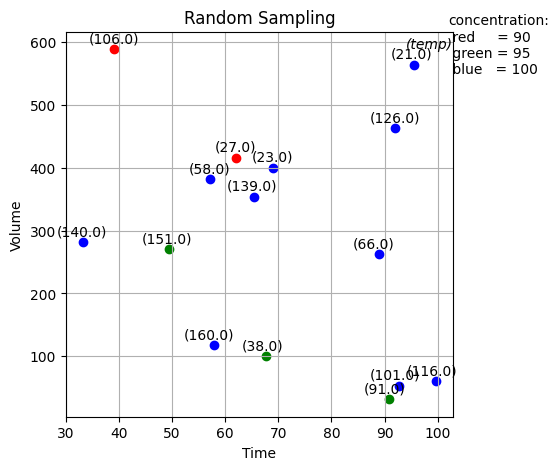

In [21]:
#data random
conc = x_random[:,0]//1
volm = x_random[:,1]//1
temp = x_random[:,2]//1
time = x_random[:,3]//1


fig = plt.figure(figsize=(5,5))
for i in range(num):
  if x_random[i,0]>= 90 and x_random[i,0]< 92.5:
    plt.scatter(x_random[i, 1], x_random[i, 3], color ='r')
  elif x_random[i,0]>= 92.5 and x_random[i,0]< 95:
    plt.scatter(x_random[i, 1], x_random[i, 3], color ='g')
  else: # x[i,0]>= 95
    plt.scatter(x_random[i, 1], x_random[i, 3], color ='b')

# Annotate each point with its label
for i,temps in enumerate(temp):
    #plt.annotate(label, (volm[i], time[i]), textcoords="offset points", xytext=(0,5), ha='center')
    plt.annotate('(%s)' %temps, (volm[i], time[i]), textcoords="offset points", xytext=(0,5), ha='center')


# plt.plot(x[:, 0], x[:, 1], "o")
plt.title("Random Sampling")
plt.ylabel('Volume')
plt.xlabel('Time')
plt.text(94, 590, '(temp)', style='oblique')
plt.text(102,550,'concentration:\n red     = 90 \n green = 95 \n blue   = 100')
plt.grid()
#ax.legend("Concentration")

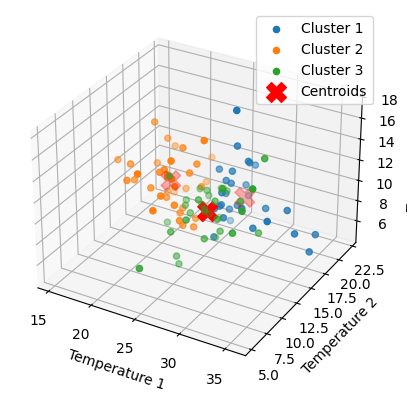

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some random temperature data for demonstration
np.random.seed(42)
temperature_data = np.random.normal(loc=[25, 15, 10], scale=[5, 3, 2], size=(100, 3))

# Assuming temperature_data is a 2D array where each row represents a data point and each column represents a variable (e.g., temperature in different locations)

# Choose the number of clusters (you need to specify this based on your understanding of the data)
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(temperature_data)

# Get cluster assignments and centroids
cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters (for 3D data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(num_clusters):
    cluster_points = temperature_data[cluster_assignments == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i + 1}')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=200, label='Centroids')
ax.set_xlabel('variable 1')
ax.set_ylabel('variable  2')
ax.set_zlabel('variable  3')
ax.legend()
plt.show()

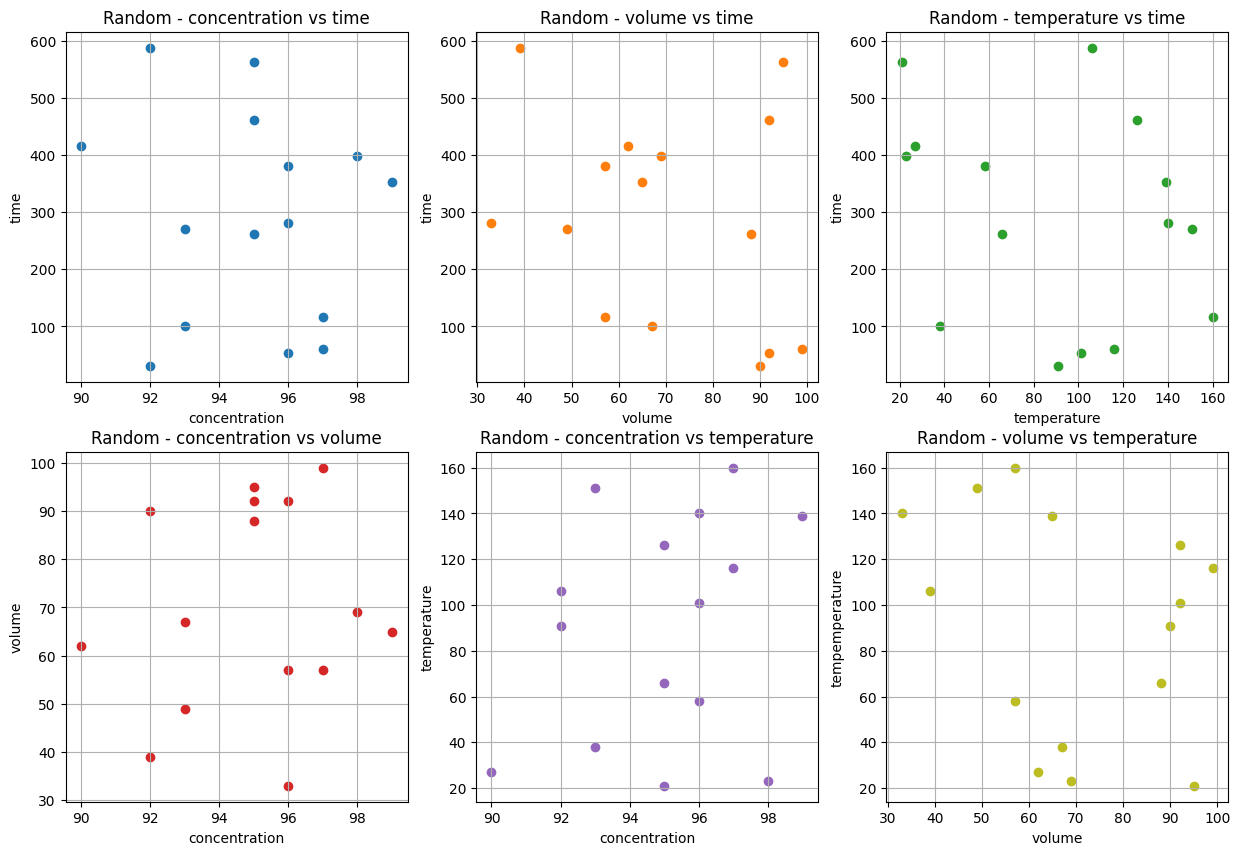

In [23]:
#2D plots for LHS visualization
fig = plt.figure(figsize=(15,10))

conc = x_random[:,0]//1
volm = x_random[:,1]//1
temp = x_random[:,2]//1
time = x_random[:,3]//1


size = [2,3]

subplot_fig([conc,time],1,size,['concentration','time'],'tab:blue')
plt.title("Random - concentration vs time")

subplot_fig([volm,time],2,size,['volume','time'],'tab:orange')
plt.title("Random - volume vs time")

subplot_fig([temp,time],3,size,['temperature','time'],'tab:green')
plt.title("Random - temperature vs time")

subplot_fig([conc,volm],4,size,['concentration','volume'],'tab:red')
plt.title("Random - concentration vs volume")

subplot_fig([conc,temp],5,size,['concentration','temperature'],'tab:purple')
plt.title("Random - concentration vs temperature")

subplot_fig([volm,temp],6,size,['volume','tempemperature'],'tab:olive')
plt.title("Random - volume vs temperature")


plt.show()



In [24]:
#Grid search sampling

# xlimits = np.array([[0.0, 4.0], [0.0, 3.0], [0.0, 3.0], [0.0, 3.0]])
xlimits = np.array([[90.0, 100.0], [33.0, 100.0], [20.0, 170.0], [30.0, 600.0]])

# Using grid search for sampling
num_points_per_dimension = 2
x_grid = np.array(np.meshgrid(*[np.linspace(min_val, max_val, num_points_per_dimension) for min_val, max_val in xlimits])).T.reshape(-1, len(xlimits))

print("Grid Search Samples:")
print(x_grid.shape)
print(x_grid)

grid_std_dev = np.std(x_grid)
grid_var_dev = np.var(x_grid)
#x_grid

Grid Search Samples:
(16, 4)
[[ 90.  33.  20.  30.]
 [ 90. 100.  20.  30.]
 [100.  33.  20.  30.]
 [100. 100.  20.  30.]
 [ 90.  33. 170.  30.]
 [ 90. 100. 170.  30.]
 [100.  33. 170.  30.]
 [100. 100. 170.  30.]
 [ 90.  33.  20. 600.]
 [ 90. 100.  20. 600.]
 [100.  33.  20. 600.]
 [100. 100.  20. 600.]
 [ 90.  33. 170. 600.]
 [ 90. 100. 170. 600.]
 [100.  33. 170. 600.]
 [100. 100. 170. 600.]]


#Grid search Sampling

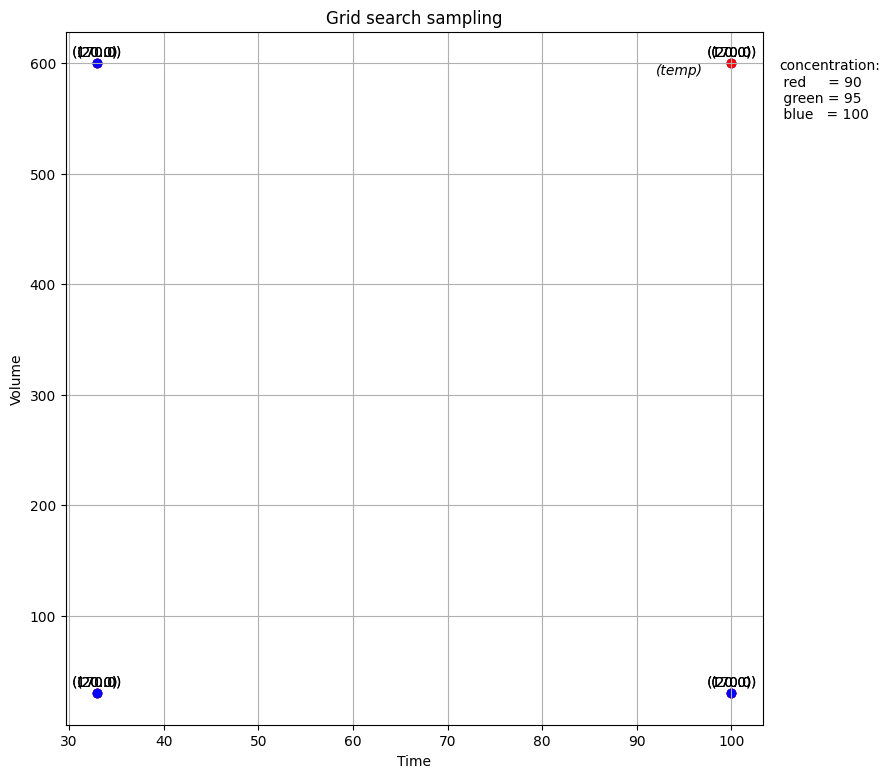

In [25]:
conc = x_grid[:,0]//1
volm = x_grid[:,1]//1
temp = x_grid[:,2]//1
time = x_grid[:,3]//1

fig = plt.figure(figsize=(9,9))
for i in range(num):
  if x_grid[i,0]>= 90 and x_grid[i,0]< 92.5:
    plt.scatter(x_grid[i, 1], x_grid[i, 3], color ='r')
  elif x_grid[i,0]>= 92.5 and x_grid[i,0]< 95:
    plt.scatter(x_grid[i, 1], x_grid[i, 3], color ='g')
  else: # x[i,0]>= 95
    plt.scatter(x_grid[i, 1], x_grid[i, 3], color ='b')

# Annotate each point with its label
for i,temps in enumerate(temp):
    #plt.annotate(label, (volm[i], time[i]), textcoords="offset points", xytext=(0,5), ha='center')
    plt.annotate('(%s)' %temps, (volm[i], time[i]), textcoords="offset points", xytext=(0,5), ha='center')


# plt.plot(x[:, 0], x[:, 1], "o")
plt.title("Grid search sampling")
plt.ylabel('Volume')
plt.xlabel('Time')
plt.text(92, 590, '(temp)', style='oblique')
plt.text(105,550,'concentration:\n red     = 90 \n green = 95 \n blue   = 100')
plt.grid()

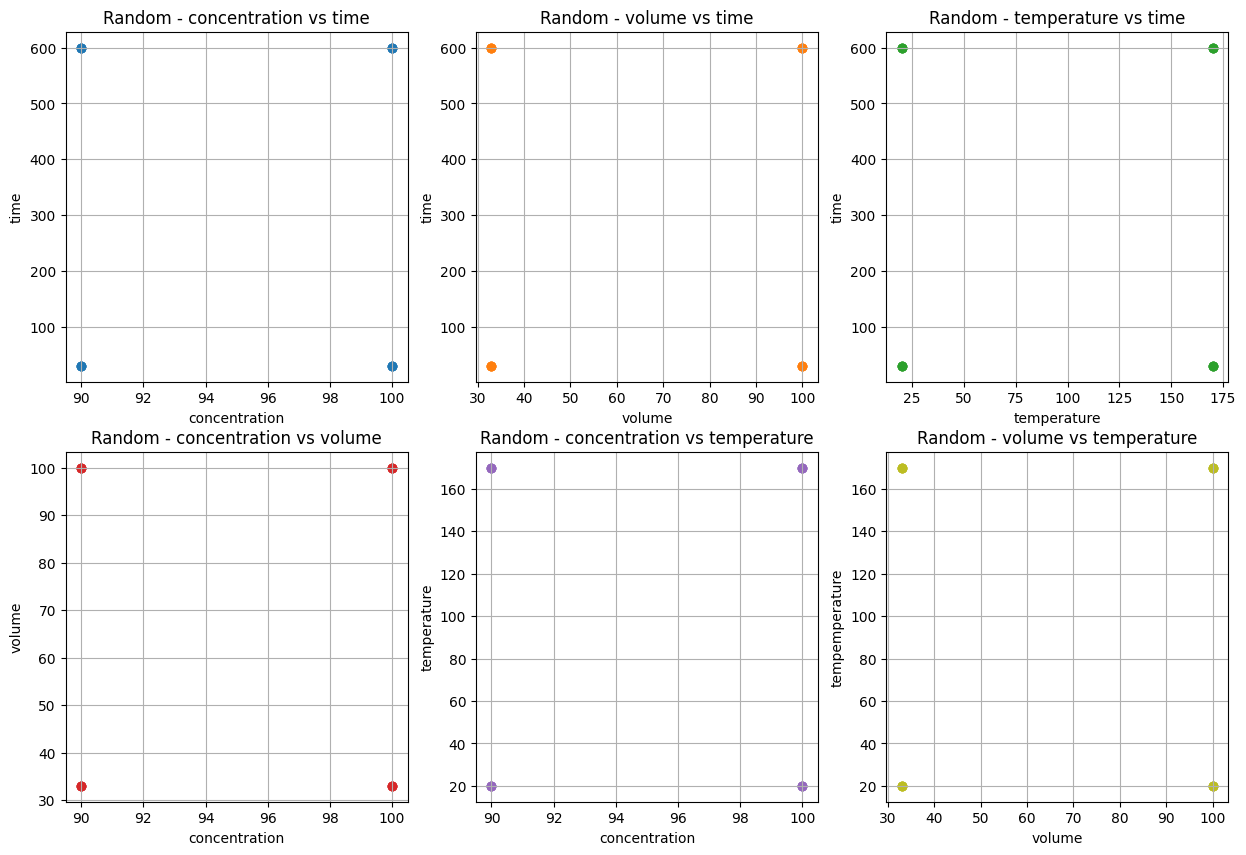

In [26]:
#2D plots for LHS visualization
fig = plt.figure(figsize=(15,10))

conc = x_grid[:,0]//1
volm = x_grid[:,1]//1
temp = x_grid[:,2]//1
time = x_grid[:,3]//1


size = [2,3]

subplot_fig([conc,time],1,size,['concentration','time'],'tab:blue')
plt.title("Random - concentration vs time")

subplot_fig([volm,time],2,size,['volume','time'],'tab:orange')
plt.title("Random - volume vs time")

subplot_fig([temp,time],3,size,['temperature','time'],'tab:green')
plt.title("Random - temperature vs time")

subplot_fig([conc,volm],4,size,['concentration','volume'],'tab:red')
plt.title("Random - concentration vs volume")

subplot_fig([conc,temp],5,size,['concentration','temperature'],'tab:purple')
plt.title("Random - concentration vs temperature")

subplot_fig([volm,temp],6,size,['volume','tempemperature'],'tab:olive')
plt.title("Random - volume vs temperature")


plt.show()



In [27]:
#Spread of Data
lhs_std_dev,random_std_dev, grid_std_dev
lhs_var_dev,random_var_dev, grid_var_dev
#Range




(17512.526481481484, 16465.678521926486, 32010.359375)